In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [3]:
df_train = df1.copy()
df_test = df2.copy()

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

In [7]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df_train.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Exploratory Data Analysis

### Univariate Analysis

#### 'Item_Outlet_Sales'

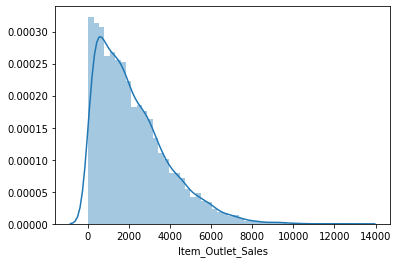

In [11]:
sns.distplot(df_train.Item_Outlet_Sales)
plt.show()

The 'Item_Outlet_Sales' is rightly skewed.

#### Plotting of Numerical Variables

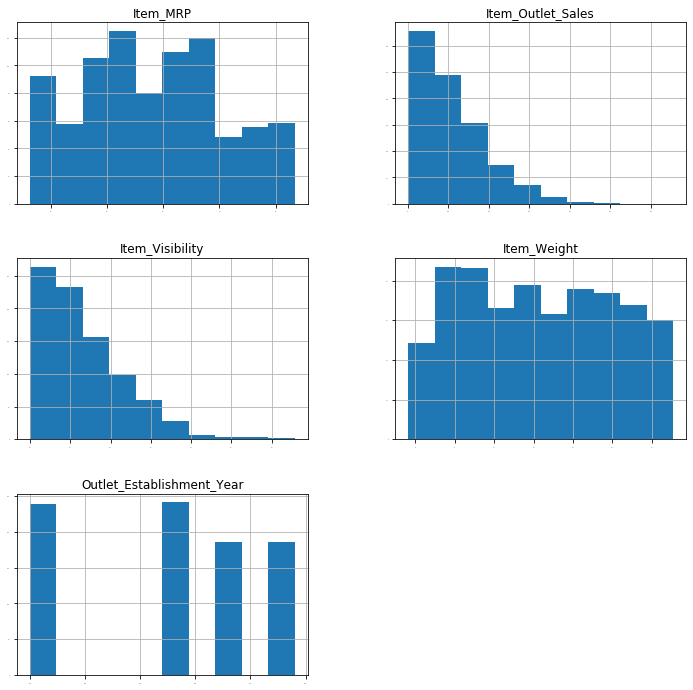

In [12]:
df_train.hist(sharex = False, sharey = False, xlabelsize = 1, ylabelsize = 1, figsize = (12,12))
plt.show()

The variable 'Item_Visibility' has values as 0 which is not possible. We will deal with them later.

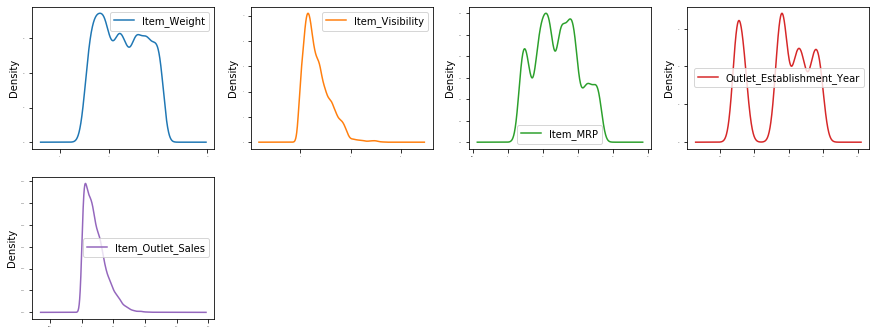

In [13]:
df_train.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

1) There seems to be no clear-cut pattern in 'Item_Weight','Item_MRP' and 'Outlet_Establishment_Year'

2) Item_Visibility is right-skewed and should be transformed to curb its skewness.

#### 'Item_Weight_Content'

In [14]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Here, 'Low Fat','LF' and 'low fat' can be added together under one named - 'Low Fat'. 'Regular' and 'reg' can be added together as 'Regular'.

In [15]:
# For Train Data
df_train["Item_Fat_Content"].replace(["Low Fat","LF","low fat"],"Low Fat",inplace = True)
df_train["Item_Fat_Content"].replace(["Regular","reg"],"Regular",inplace = True)

In [16]:
# For Test Data
df_test["Item_Fat_Content"].replace(["Low Fat","LF","low fat"],"Low Fat",inplace = True)
df_test["Item_Fat_Content"].replace(["Regular","reg"],"Regular",inplace = True)

In [17]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
df_train["Item_Fat_Content"].value_counts(normalize = True)

Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64

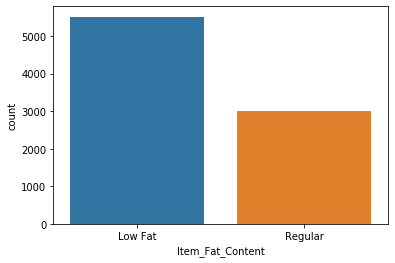

In [19]:
sns.countplot(x = "Item_Fat_Content", data = df_train)
plt.show()

The items with 'Low Fat' are more than that of 'Regular'

#### Item_Type

In [20]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

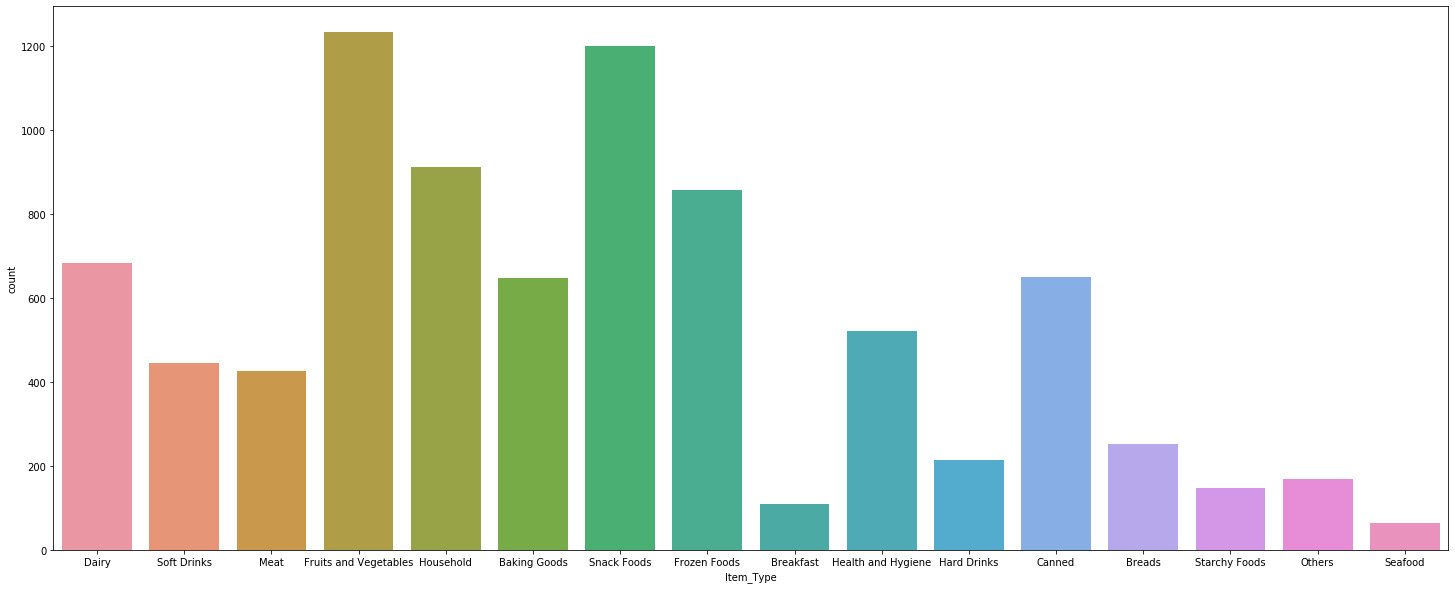

In [21]:
plt.figure(figsize=(25,10))
sns.countplot(x = "Item_Type", data = df_train)
plt.show()

'Food and Vegetables','Snack Foods','Household','Frozen Foods' comprise most of the Item Types

#### 'Outlet_Identifier'

In [22]:
df_train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

#### 'Outlet_Establishment_Year'

In [23]:
df_train["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

#### 'Outlet_Size'

In [24]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

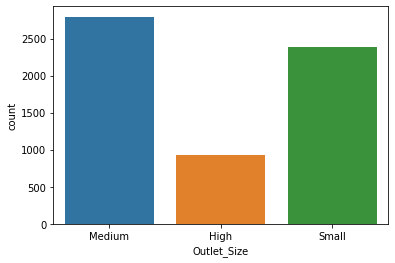

In [25]:
sns.countplot(x = "Outlet_Size", data = df_train)
plt.show()

Most of the outlet sizes are 'medium'

#### 'Outlet_Location_Type'

In [26]:
df_train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Even thought 'Tier 3' has most number of outlets, there are enought number of outlets in 'Tier 1' and 'Tier 2'

#### 'Outlet_Type'

In [27]:
df_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

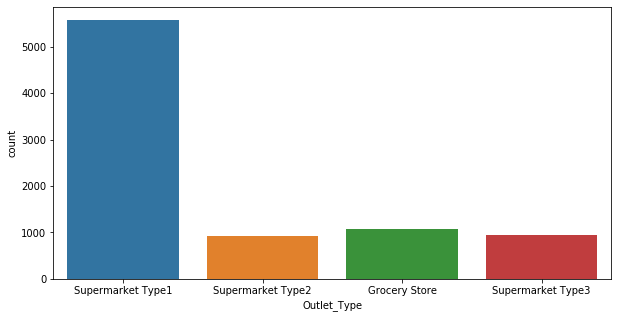

In [28]:
plt.figure(figsize =(10,5))
sns.countplot(x = "Outlet_Type", data = df_train)
plt.show()

'Supermarket Type1' seems to be the most popular category of Outlet_Type

### Bivariate Analysis

#### Target Variable 'Item_Outlet_Sales' vs 'Numerical Variables'

C:\Users\Dharmil\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dharmil\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


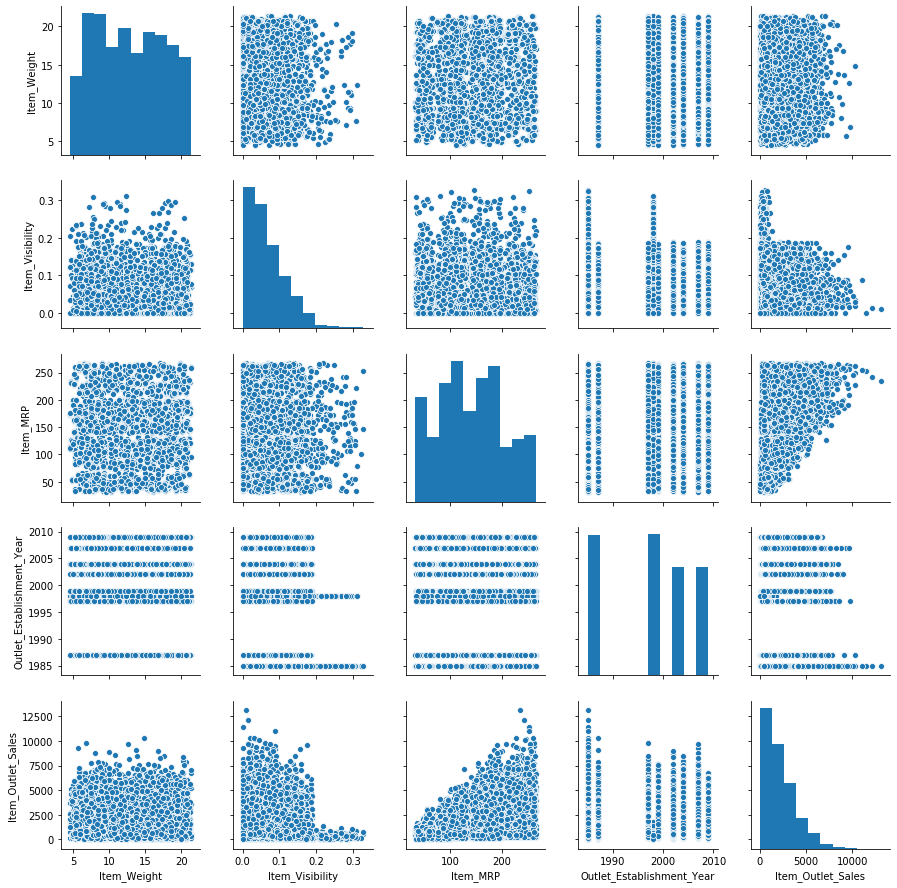

In [29]:
# Scatter plot matrix using seaborn library
import seaborn as sns
sns.pairplot(df_train)
plt.show()

1) Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.

2) In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which cannot happen as item visibility cannot be completely zero.

3) In the third plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices.

4) There is no particular observed pattern for 'Outlet_Establishment_Year' Vs 'Item_Outlet_Sales'.

#### 'Item_Fat_Content' Vs 'Item_Outlet_Sales'

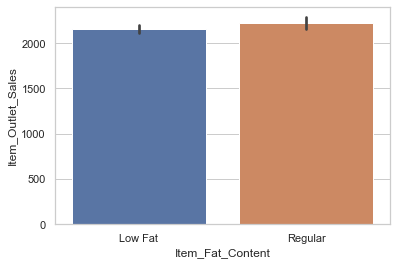

In [30]:
sns.set(style="whitegrid")
sns.barplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = df_train)
plt.show()

    The sales of items with 'Low Fat' and 'Regular' are almost same.

#### 'Item_Type' Vs 'Item_Outlet_Sales'

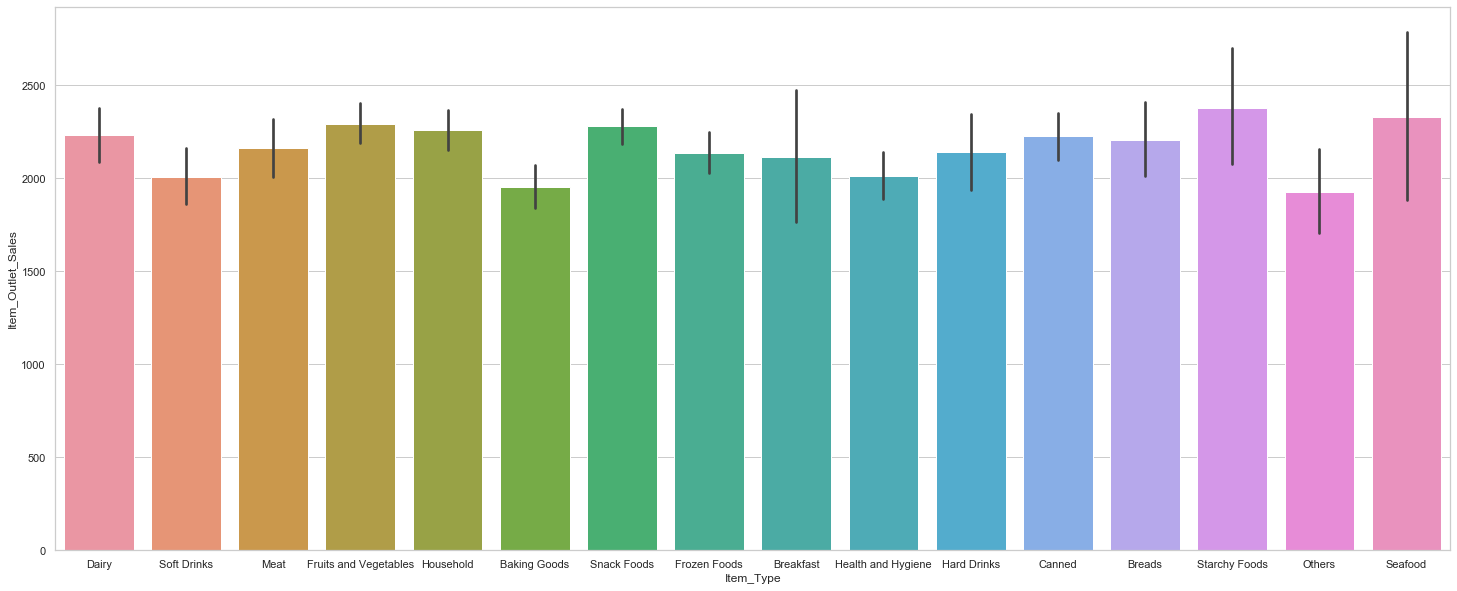

In [31]:
plt.figure(figsize = (25,10))
sns.barplot(x = "Item_Type", y = "Item_Outlet_Sales", data = df_train)
plt.show()

Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct.

#### 'Outlet_Establishment_Year' Vs 'Item_Outlet_Sales'

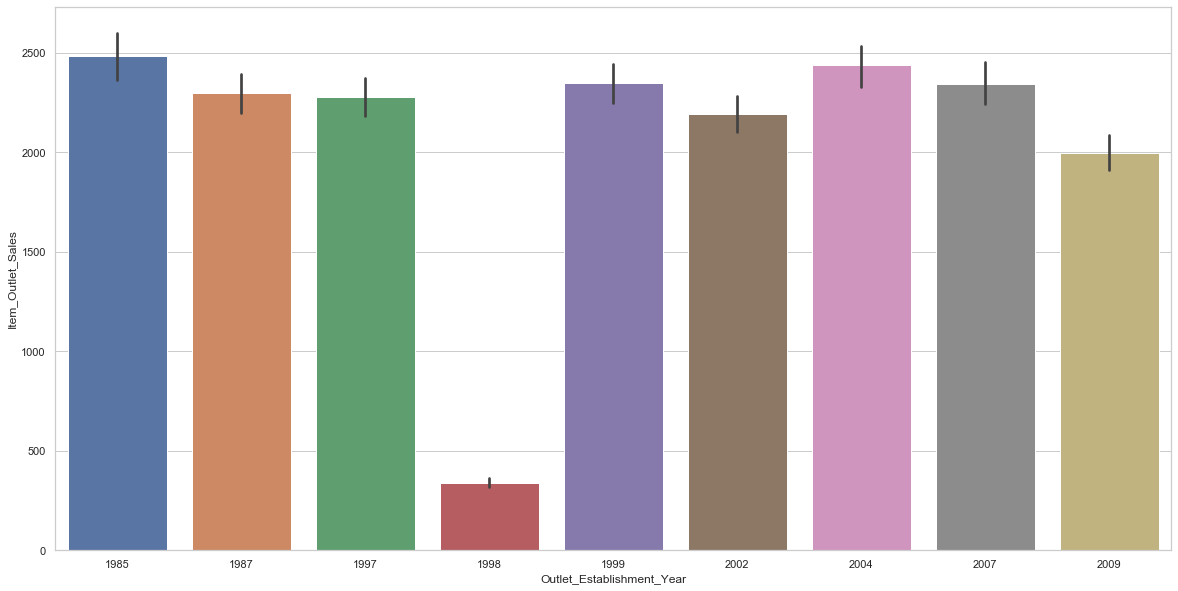

In [32]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Outlet_Establishment_Year", y = "Item_Outlet_Sales", data = df_train)
plt.show()

There is no particular relation between 'Outlet_Establishment_Year' and 'Item_Outlet_Sales'

#### 'Outlet_Size' Vs 'Item_Outlet_Sales'

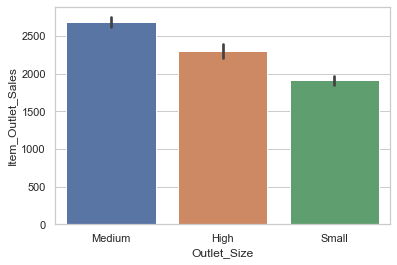

In [33]:
sns.barplot(x = "Outlet_Size", y = "Item_Outlet_Sales", data = df_train)
plt.show()

Medium sized outlets have the highest amount of sales.

#### 'Outlet_Size' Vs 'Item_Outlet_Sales'

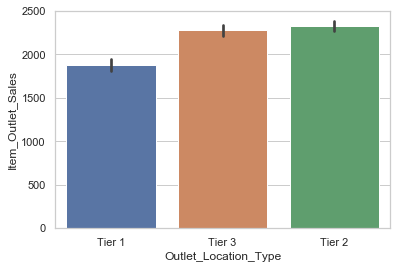

In [34]:
sns.barplot(x = "Outlet_Location_Type", y = "Item_Outlet_Sales", data = df_train)
plt.show()

Outlets in Tier 3 and Tier 2 have the most sales.

#### 'Outlet_Type' Vs 'Item_Outlet_Sales'

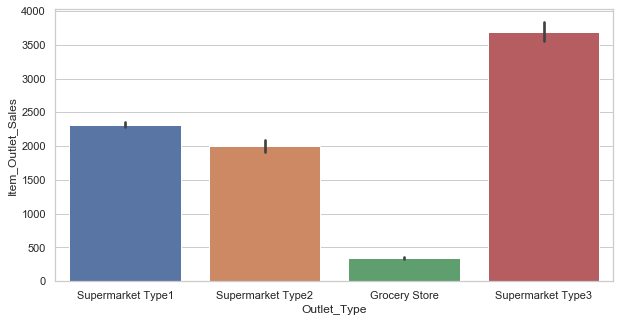

In [35]:
plt.figure(figsize = (10,5))
sns.barplot(x = "Outlet_Type", y = "Item_Outlet_Sales", data = df_train)
plt.show()

'Supermarket Type3' have the most sales whereas 'Grocery Store' has the least.

### Missing Values Imputation

In [36]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### We impute the missing values in 'Item_Weight' by the mean.

In [38]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(),inplace=True)
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(),inplace=True)

#### We now impute  for  'Outlet_Size'

In [39]:
df_train["Outlet_Size"].value_counts(normalize = True)

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

In [40]:
df_test["Outlet_Size"].value_counts(normalize = True)

Medium    0.456933
Small     0.390675
High      0.152393
Name: Outlet_Size, dtype: float64

Instead of imputing the missing values with Mode, we impute it in ratio of the outlet sizes randomly such that the proportion before and after imputing remains the same.

In [41]:
df_train["Outlet_Size"] = df_train["Outlet_Size"].fillna(pd.Series(np.random.choice(["Medium","Small","High"],p = [0.46,0.39,0.15],size = len(df_train))))
df_train["Outlet_Size"].value_counts(normalize = True)

Medium    0.457820
Small     0.388713
High      0.153467
Name: Outlet_Size, dtype: float64

In [42]:
df_test["Outlet_Size"] = df_test["Outlet_Size"].fillna(pd.Series(np.random.choice(["Medium","Small","High"],p = [0.46,0.39,0.15],size = len(df_test))))
df_test["Outlet_Size"].value_counts(normalize = True)

Medium    0.449569
Small     0.394121
High      0.156311
Name: Outlet_Size, dtype: float64

#### 'Item_Visibility'

In [43]:
df_train["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

On the basis of above table and the univariate analysis on 'Item_Visibility', there are many items whose visibility is 0 which is not possible. So we replace  '0' with the mean.

In [44]:
df_train["Item_Visibility"].replace(0,df_train["Item_Visibility"].mean(),inplace = True)
df_test["Item_Visibility"].replace(0,df_test["Item_Visibility"].mean(),inplace = True)

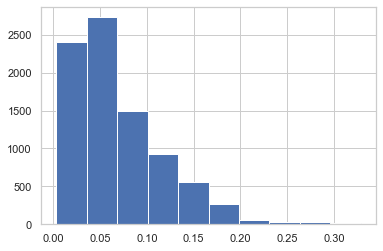

In [45]:
df_train["Item_Visibility"].hist()

We can see that no item has a '0' visibility.

In [46]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


#### 'Item_Type'

In [47]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

We have 16 item types in the column 'Item_Type'. 

1) If we use 'Label Encoding', we get the numbers 1-16. Thus, the item with a higher number will be given more weighatge.

2) If we use 'OneHotEncoding', we create more number of features which will affect our model.

3) We can divide each of the items into 3 categories namely - 'Food','Drinks' and 'Non_consumables'.

#### For Train Data

In [48]:
df_train['Item_Type_Combined'] = df_train['Item_Identifier'].apply(lambda x: x[0:2])

In [49]:
df_train['Item_Type_Combined']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_Combined, Length: 8523, dtype: object

In [50]:
df_train['Item_Type_Combined'] = df_train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non_Consumable',
                                                             'DR':'Drinks'})
df_train['Item_Type_Combined'].value_counts()

Food              6125
Non_Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

#### For test Data

In [51]:
df_test['Item_Type_Combined'] = df_test['Item_Identifier'].apply(lambda x: x[0:2])

In [52]:
df_test['Item_Type_Combined'] = df_test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non_Consumable',
                                                             'DR':'Drinks'})
df_test['Item_Type_Combined'].value_counts()

Food              4076
Non_Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

We need to drop 'Item_Type' variable from Train and Test data. We will drop it later.

### Converting Categorical to Numerical values

#### For Train Data

In [53]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_Consumable


In [54]:
Item_Fat_Content_d = pd.get_dummies(df_train["Item_Fat_Content"],drop_first = True)
Item_Type_Combined_d = pd.get_dummies(df_train["Item_Type_Combined"],drop_first = True)
Outlet_Size_d = pd.get_dummies(df_train["Outlet_Size"],drop_first = True)
Outlet_Location_Type_d = pd.get_dummies(df_train["Outlet_Location_Type"],drop_first = True)
Outlet_Type_d = pd.get_dummies(df_train["Outlet_Type"],drop_first = True)

In [55]:
df_train = pd.concat([df_train,Item_Fat_Content_d,Item_Type_Combined_d,Outlet_Size_d,Outlet_Location_Type_d,Outlet_Type_d],sort = True)
df_train.head()

,Food,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Type_Combined,Item_Visibility,Item_Weight,Medium,...,Outlet_Location_Type,Outlet_Size,Outlet_Type,Regular,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,NaN,Low Fat,FDA15,249.8092,3735.1380,Dairy,Food,0.016047,9.30,NaN,...,Tier 1,Medium,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Regular,DRC01,48.2692,443.4228,Soft Drinks,Drinks,0.019278,5.92,NaN,...,Tier 3,Medium,Supermarket Type2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Low Fat,FDN15,141.6180,2097.2700,Meat,Food,0.016760,17.50,NaN,...,Tier 1,Medium,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,Food,0.066132,19.20,NaN,...,Tier 3,Medium,Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Low Fat,NCD19,53.8614,994.7052,Household,Non_Consumable,0.066132,8.93,NaN,...,Tier 3,High,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_train = df_train.drop(["Item_Fat_Content","Item_Identifier","Item_Type","Item_Type_Combined","Outlet_Location_Type","Outlet_Size","Outlet_Type","Outlet_Establishment_Year","Outlet_Identifier"],axis = 1)
df_train.head()                          

,Food,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Medium,Non_Consumable,Regular,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,NaN,249.8092,3735.1380,0.016047,9.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,48.2692,443.4228,0.019278,5.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,141.6180,2097.2700,0.016760,17.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,182.0950,732.3800,0.066132,19.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,53.8614,994.7052,0.066132,8.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_train.columns

Index(['Food', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility',
       'Item_Weight', 'Medium', 'Non_Consumable', 'Regular', 'Small',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Tier 2',
       'Tier 3'],
      dtype='object')

In [58]:
df_train.replace(np.nan,0,inplace = True)

In [59]:
df_train.head()

,Food,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Medium,Non_Consumable,Regular,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,0.0,249.8092,3735.1380,0.016047,9.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,48.2692,443.4228,0.019278,5.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,141.6180,2097.2700,0.016760,17.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,182.0950,732.3800,0.066132,19.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,53.8614,994.7052,0.066132,8.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
df_train.shape

(51138, 14)

#### For Test Data

In [61]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Non_Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food


In [62]:
Item_Fat_Content_d = pd.get_dummies(df_test["Item_Fat_Content"],drop_first = True)
Item_Type_Combined_d = pd.get_dummies(df_test["Item_Type_Combined"],drop_first = True)
Outlet_Size_d = pd.get_dummies(df_test["Outlet_Size"],drop_first = True)
Outlet_Location_Type_d = pd.get_dummies(df_test["Outlet_Location_Type"],drop_first = True)
Outlet_Type_d = pd.get_dummies(df_test["Outlet_Type"],drop_first = True)

In [63]:
df_test = pd.concat([df_test,Item_Fat_Content_d,Item_Type_Combined_d,Outlet_Size_d,Outlet_Location_Type_d,Outlet_Type_d],sort = True)
df_test.head()

,Food,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Type_Combined,Item_Visibility,Item_Weight,Medium,Non_Consumable,...,Outlet_Location_Type,Outlet_Size,Outlet_Type,Regular,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,NaN,Low Fat,FDW58,107.8622,Snack Foods,Food,0.007565,20.750000,NaN,NaN,...,Tier 1,Medium,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Regular,FDW14,87.3198,Dairy,Food,0.038428,8.300000,NaN,NaN,...,Tier 2,Medium,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Low Fat,NCN55,241.7538,Others,Non_Consumable,0.099575,14.600000,NaN,NaN,...,Tier 3,Small,Grocery Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Low Fat,FDQ58,155.0340,Snack Foods,Food,0.015388,7.315000,NaN,NaN,...,Tier 2,Medium,Supermarket Type1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Regular,FDY38,234.2300,Dairy,Food,0.118599,12.695633,NaN,NaN,...,Tier 3,Medium,Supermarket Type3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df_test = df_test.drop(["Item_Fat_Content","Item_Identifier","Item_Type","Item_Type_Combined","Outlet_Location_Type","Outlet_Size","Outlet_Type","Outlet_Establishment_Year","Outlet_Identifier"],axis = 1)
df_test.head()                          

,Food,Item_MRP,Item_Visibility,Item_Weight,Medium,Non_Consumable,Regular,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,NaN,107.8622,0.007565,20.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,87.3198,0.038428,8.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,241.7538,0.099575,14.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,155.0340,0.015388,7.315000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,234.2300,0.118599,12.695633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_test.replace(np.nan,0,inplace = True)

In [66]:
df_test.head()

,Food,Item_MRP,Item_Visibility,Item_Weight,Medium,Non_Consumable,Regular,Small,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 2,Tier 3
0,0.0,107.8622,0.007565,20.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,87.3198,0.038428,8.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,241.7538,0.099575,14.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,155.0340,0.015388,7.315000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,234.2300,0.118599,12.695633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
df_test.shape

(34086, 13)

### Correlation

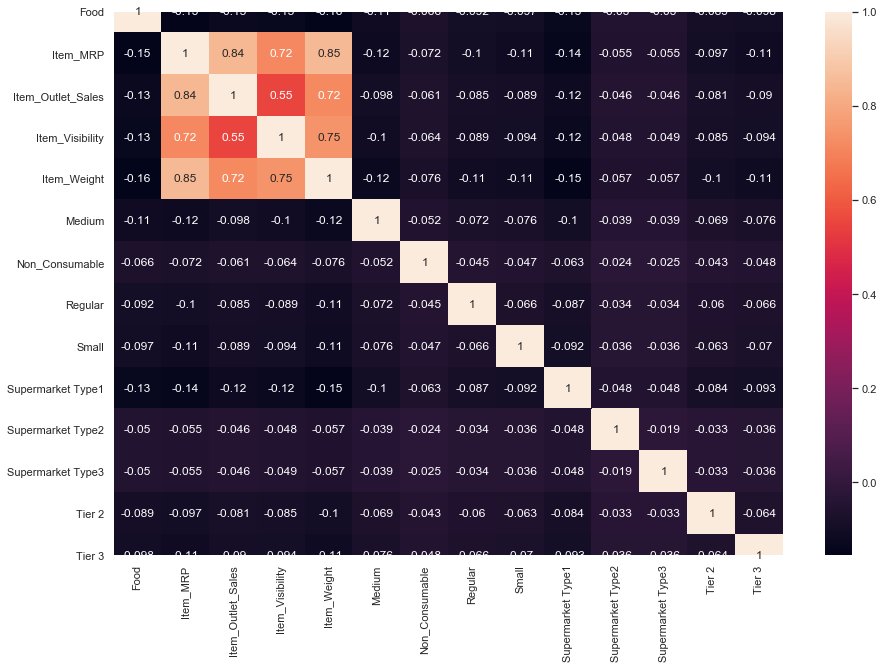

In [68]:
plt.figure(figsize=(15,10))
corr = df_train.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot = True)
plt.show()

### Feature Scaling

#### Normalization

In [69]:
#from sklearn.preprocessing import MinMaxScaler

#norm = MinMaxScaler()
#df_train = norm.fit_transform(df_train)
#df_test = norm.fit_transform(df_test)

Renaming columns for Train Data

In [70]:
df_train.columns = ["Food","Item_MRP","Item_Outlet_Sales","Item_Visibility","Item_Weight","Medium","Non_consumable","Regular","Small","Supermarket_Type1","Supermarket_Type2","Supermarket_Type3","Tier_2","Tier_3"]

In [71]:
df_train.columns

Index(['Food', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility',
       'Item_Weight', 'Medium', 'Non_consumable', 'Regular', 'Small',
       'Supermarket_Type1', 'Supermarket_Type2', 'Supermarket_Type3', 'Tier_2',
       'Tier_3'],
      dtype='object')

Renaming Columns for Test Data

In [72]:
df_test.columns = ["Food","Item_MRP","Item_Visibility","Item_Weight","Medium","Non_consumable","Regular","Small","Supermarket_Type1","Supermarket_Type2","Supermarket_Type3","Tier_2","Tier_3"]

In [73]:
df_test.columns

Index(['Food', 'Item_MRP', 'Item_Visibility', 'Item_Weight', 'Medium',
       'Non_consumable', 'Regular', 'Small', 'Supermarket_Type1',
       'Supermarket_Type2', 'Supermarket_Type3', 'Tier_2', 'Tier_3'],
      dtype='object')

### Train-Test Split

In [74]:
from sklearn.model_selection import train_test_split

trainingset,testingset = train_test_split(df_train,test_size = 0.2, random_state = 10)

In [75]:
trainingset.shape, testingset.shape

((40910, 14), (10228, 14))

### Model-Building

In [76]:
import statsmodels.formula.api as smf

In [77]:
model1 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Non_consumable + Regular + Small + Supermarket_Type1 + Supermarket_Type2 + Supermarket_Type3 + Tier_2 + Tier_3",data = trainingset)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     8133.
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:57   Log-Likelihood:            -3.1754e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40896   BIC:                         6.352e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.2095      5.91

We eliminate 'Supermarket_Type2'.

In [78]:
model2 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Non_consumable + Regular + Small + Supermarket_Type1 + Supermarket_Type3 + Tier_2 + Tier_3",data = trainingset)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     8811.
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:57   Log-Likelihood:            -3.1754e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40897   BIC:                         6.352e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            15.9302      5.69

We eliminate 'Supermarket_Type3'.

In [79]:
model3 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Non_consumable + Regular + Small + Supermarket_Type1 + Tier_2 + Tier_3",data = trainingset)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     9612.
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:57   Log-Likelihood:            -3.1754e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40898   BIC:                         6.352e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.8252      5.49

We eliminate 'Non-consumable'

In [80]:
model4 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Regular + Small + Supermarket_Type1 + Tier_2 + Tier_3",data = trainingset)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.057e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:57   Log-Likelihood:            -3.1754e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40899   BIC:                         6.352e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.2567      5.19

We eliminate 'Tier_2'

In [81]:
model5 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Regular + Small + Supermarket_Type1 + Tier_3",data = trainingset)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.175e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:57   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40900   BIC:                         6.352e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.1989      4.77

We eliminate 'Regular'.

In [82]:
model6 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Small + Supermarket_Type1 + Tier_3",data = trainingset)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:58   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40901   BIC:                         6.352e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.5641      4.41

We eliminate 'Small'

In [83]:
model7 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Supermarket_Type1 + Tier_3",data = trainingset)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.510e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:58   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40902   BIC:                         6.352e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.2522      4.09

We eliminate 'Tier_3'

In [84]:
model8 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Supermarket_Type1",data = trainingset)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.762e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:58   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40903   BIC:                         6.352e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.2518      3.84

We eliminate 'Medium'

In [85]:
model9 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Supermarket_Type1",data = trainingset)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.115e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:58   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40904   BIC:                         6.352e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.3439      3.59

We eliminate 'Supermarket_Type1'

In [86]:
model10 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight",data = trainingset)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.643e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:58   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40905   BIC:                         6.351e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3791      3.307     

We eliminate 'Food'

In [87]:
model11 = smf.ols(formula = "Item_Outlet_Sales ~ Item_MRP + Item_Visibility + Item_Weight",data = trainingset)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 3.525e+04
Date:                Sat, 23 May 2020   Prob (F-statistic):               0.00
Time:                        19:45:58   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40906   BIC:                         6.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6121      3.062     

We use only columns 'Item_MRP','Item_Visibility','Item_Weight' for evaluation.

#### Train Set Metrics

In [88]:
from sklearn.metrics import mean_squared_error, r2_score

pred1 = result11.predict(trainingset[["Item_MRP","Item_Visibility","Item_Weight"]])

In [89]:
print("Train MSE: ",mean_squared_error(trainingset["Item_Outlet_Sales"],pred1))
print("Train RMSE: ",np.sqrt(mean_squared_error(trainingset["Item_Outlet_Sales"],pred1)))
print("R-square : ",r2_score(trainingset["Item_Outlet_Sales"],pred1))
print("Adjusted R_squared = ",result11.rsquared_adj)

Train MSE:  323282.8929647005
Train RMSE:  568.5797155761895
R-square :  0.7210481383294439
Adjusted R_squared =  0.7210276803138724


#### Test Set Metrics

In [90]:
pred2 = result11.predict(testingset[["Item_MRP","Item_Visibility","Item_Weight"]])

In [91]:
print("Test MSE: ",mean_squared_error(testingset["Item_Outlet_Sales"],pred2))
print("Test RMSE: ",np.sqrt(mean_squared_error(testingset["Item_Outlet_Sales"],pred2)))
print("R-square: ",r2_score(testingset["Item_Outlet_Sales"],pred2))

Test MSE:  315612.3797433712
Test RMSE:  561.7938943628448
R-square:  0.7117320796672983


## Using SciKit Learn

In [92]:
X = df_train[["Item_MRP","Item_Visibility","Item_Weight"]]
y = df_train["Item_Outlet_Sales"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [94]:
X_train.shape, X_test.shape

((40910, 3), (10228, 3))

In [95]:
y_train.shape, y_test.shape

((40910,), (10228,))

In [96]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
print("Intercept: ",lr1.intercept_)
print("Coefficients: ",lr1.coef_)

Intercept:  4.612059856442386
Coefficients:  [   16.43548251 -4070.98850564    10.61062531]


In [98]:
pred_lr = lr1.predict(X_test)

In [99]:
print("MSE: ",mean_squared_error(y_test,pred_lr))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_lr)))
print("R-square: ",r2_score(y_test,pred_lr))

MSE:  315612.3797433766
RMSE:  561.7938943628495
R-square:  0.7117320796672933


## DECISION TREES

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dt_model1 = DecisionTreeRegressor(random_state  = 10)
dt_model1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

In [102]:
dt_pred1 = dt_model1.predict(X_test)

In [103]:
print("MSE: ",mean_squared_error(y_test,dt_pred1))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,dt_pred1)))
print("R-square: ",r2_score(y_test,dt_pred1))

MSE:  589256.4235697143
RMSE:  767.6303951575356
R-square:  0.46179638484635577


In [104]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model2 = DecisionTreeRegressor(max_depth = depth,random_state = 10)
    dt_model2.fit(X_train, y_train)
    train_accuracy.append(dt_model2.score(X_train,y_train))
    validation_accuracy.append(dt_model2.score(X_test,y_test))

In [105]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.624630,0.613410
1,2,0.695508,0.687283
2,3,0.713856,0.698549
3,4,0.725042,0.712077
4,5,0.731334,0.718639


No handles with labels found to put in legend.


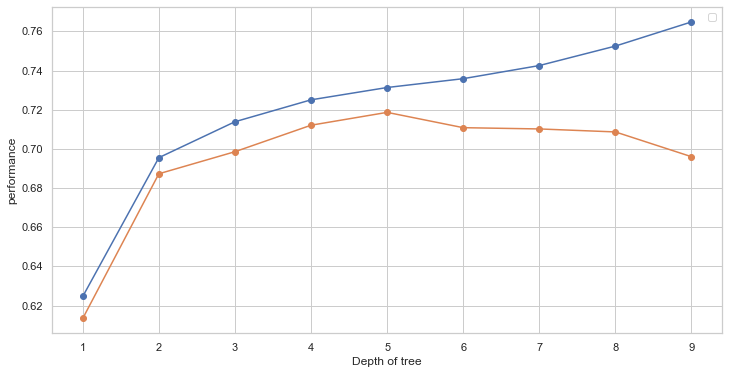

In [106]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

At depth=5, both the Train and Test Score is High and does not have much difference. So we select depth = 5.

In [107]:
dt_model3 = DecisionTreeRegressor(max_depth=5,random_state = 10)

In [108]:
dt_model3.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=10, splitter='best')

In [109]:
dt_pred3 = dt_model3.predict(X_test)

In [110]:
print("MSE: ",mean_squared_error(y_test,dt_pred3))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,dt_pred3)))
print("R-square: ",r2_score(y_test,dt_pred3))

MSE:  308050.783434207
RMSE:  555.0232278330403
R-square:  0.7186385439961391


## Random Forest

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rm_model1 = RandomForestRegressor(max_depth=5,random_state = 10)
rm_model1.fit(X_train,y_train)

C:\Users\Dharmil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [137]:
rm_pred1 = rm_model1.predict(X_test)

In [138]:
print("MSE: ",mean_squared_error(y_test,rm_pred1))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,rm_pred1)))
print("R-square: ",r2_score(y_test,rm_pred1))

MSE:  308212.75663427537
RMSE:  555.1691243524583
R-square:  0.7184906040529364


In [139]:
!pip install xgboost

In [127]:
from xgboost import XGBRegressor

In [129]:
xg1 = XGBRegressor()
xg1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [130]:
xg_pred1 = xg1.predict(X_test)

In [131]:
print("MSE: ",mean_squared_error(y_test,xg_pred1))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,xg_pred1)))
print("R-square: ",r2_score(y_test,xg_pred1))

MSE:  354568.4190106517
RMSE:  595.456479526969
R-square:  0.6761511673054033


## Decision Tree and Random Forest both approximately  gives us the least RMSE.

Now we run the Random Forest model on Test Data

In [115]:
df_test

,Food,Item_MRP,Item_Visibility,Item_Weight,Medium,Non_consumable,Regular,Small,Supermarket_Type1,Supermarket_Type2,Supermarket_Type3,Tier_2,Tier_3
0,0.0,107.8622,0.007565,20.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,87.3198,0.038428,8.300000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,241.7538,0.099575,14.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,155.0340,0.015388,7.315000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,234.2300,0.118599,12.695633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5677,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5678,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5679,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [116]:
X1 = df_test[["Item_MRP","Item_Visibility","Item_Weight"]]

In [117]:
rm_pred2 = rm_model1.predict(X1)

In [118]:
print(rm_pred2)

[1507.48206793 1514.07159351 3376.49805323 ...    0.            0.
    0.        ]


In [119]:
rm_pred2.shape

(34086,)

In [120]:
submission = pd.read_excel("Final_Submission.xlsx")

In [121]:
submission["Item_Outlet_Sales"] = rm_pred2

In [122]:
submission["Item_Identifier"] = df2["Item_Identifier"]
submission["Outlet_Identifier"] = df2["Outlet_Identifier"]

In [123]:
submission.head()

,Item_Outlet_Sales,Item_Identifier,Outlet_Identifier
0,1507.482068,FDW58,OUT049
1,1514.071594,FDW14,OUT017
2,3376.498053,NCN55,OUT010
3,2432.076347,FDQ58,OUT017
4,3236.061614,FDY38,OUT027


In [124]:
pd.DataFrame(submission, columns=["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier"]).to_csv('Submission_Final.csv')